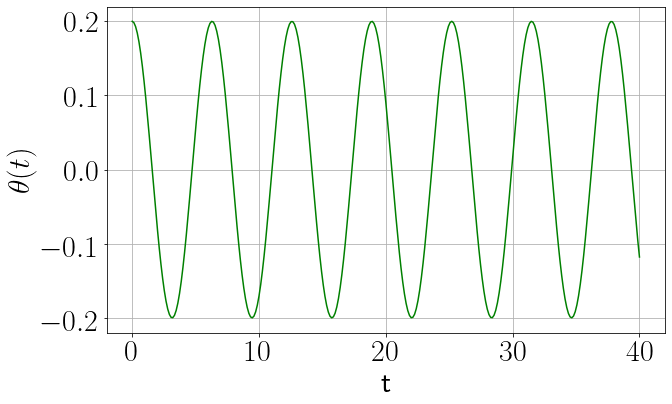

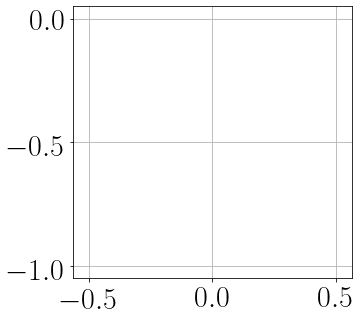

In [15]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 27 08:30:03 2021

@author: chris
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint

def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - np.sin(theta)]
    return dydt

b = 0.0
c = 1.0
y0 = [0.2, 0.0]
t = np.linspace(0, 40, 301)

fig = plt.figure(figsize=(10, 6), facecolor='w')
ax = fig.add_subplot(1, 1, 1)
plt.rcParams['font.size'] = 30
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
plt.rcParams['text.usetex'] = True

sol = odeint(pend, y0, t, args=(b, c))

plt.plot(t, sol[:, 0], 'g')
#plt.plot(t, sol[:, 1], 'g', label='omega(t)')
#plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel(r'$\theta(t)$')

plt.grid()
plt.show()

fig = plt.figure(figsize=(5, 5), facecolor='w')
ax = fig.add_subplot(1, 1, 1)

lns = []
for i in range(len(sol)):
    ln, = ax.plot([0, np.sin(sol[i, 0])], [0, -np.cos(sol[i, 0])],
                  color='k', lw=2)
    dot, = ax.plot(np.sin(sol[i, 0]), -np.cos(sol[i, 0]), marker=".", markersize=40, color='r')
    tm = ax.text(-1, 0.9, 'time = %.1fs' % t[i])
    lns.append([ln, tm, dot])
ax.set_aspect('equal', 'datalim')
ax.grid()
ani = animation.ArtistAnimation(fig, lns, interval=50)

fn = 'odeint_single_pendulum_artistanimation'
ani.save(fn+'.mp4',writer='ffmpeg',fps=1000/50)
ani.save(fn+'.gif',writer='imagemagick',fps=1000/50)


plt.rcParams['animation.html'] = 'html5'
ani